# **Data Visualization Deep Dive**

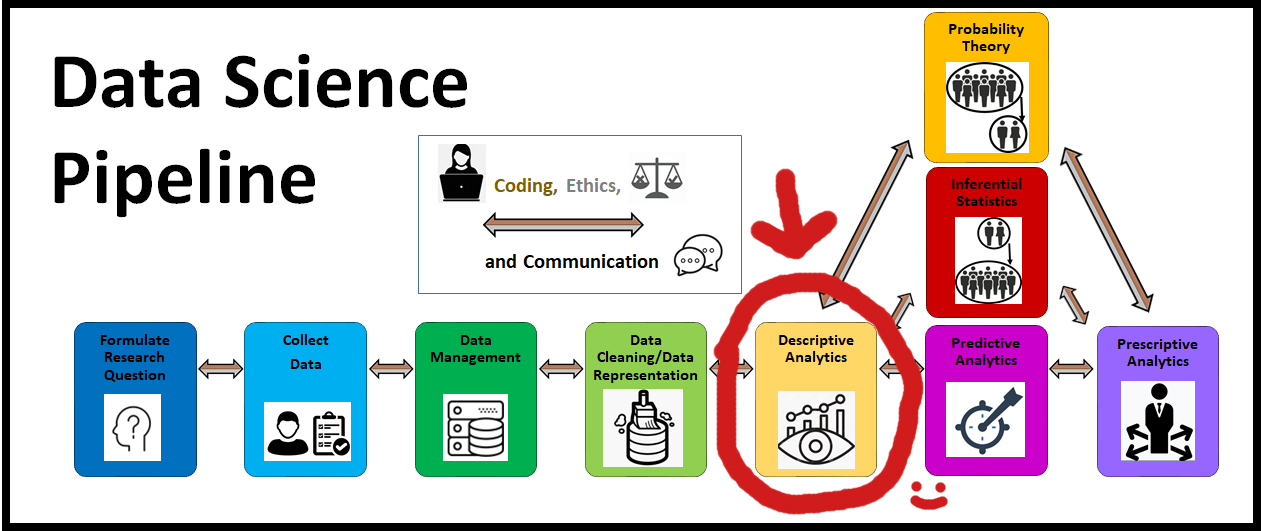

Welcome to the data visualization workshop! After your data is all cleaned up, the next step is to start with some **exploratory data analysis** (EDA). This involves looking for trends and relationships in the data that might help with your goal, which in our case is building a model. While you could try and spot patterns by looking at hundreds of thousands of numbers in Excel, our preferred method is using data visualization. In this workshop, we will use `matplotlib`, `seaborn`, and `altair`, three of the most popular data visualization libraries in Python, to construct scatterplots, heatmaps, and other graphs that you can use with your own data.

If you don't have `pandas`, `numpy`, `matplotlib`, `seaborn`, or `altair` installed, remove the # below and run the cell.

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install altair

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib.colors import CenteredNorm
import seaborn as sns
import altair as alt

The first dataset we will work with contains information about buildings owned by the University of Illinois. Each row contains information on the building's location, square footage, the year it was acquired, its number of floors, and more. 

In [ ]:
df = pd.read_csv("building_inventory.csv", 
                 na_values={'Square Footage': 0, 'Year Constructed':0,'Year Acquired':0}) 

In [ ]:
df.head()

In [ ]:
df.columns

Let's start with a basic scatterplot, graphing `Year Acquired` against `Square Footage` to look for a relationship. Do more recently-acquired buildings tend to be bigger?

In [ ]:
plt.scatter(...)
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

Most of our data is clustered around low square-footages, which makes it hard to identify trends. In this case, we can try adjusting the scale of the graph. There are a couple ways to do this, the first is by rescaling our `y` variable. Let's try a square-root scale, which is good for squashing down small values and spreading out low clusters. All we have to do is instead plot `Year Acquired` against the **square root** of `Square Footage` (sounds like it's just "footage" now!)

In [ ]:
plt.scatter(...)
plt.yticks(ticks=list(range(0, 1200, 200)), labels=np.square(list(range(0, 1200, 200))))
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.show()

Looks better, but we still have quite the cluster. Another scale we could use that spreads the data even further is a log scale. Instead of manually transforming our `y` variable, we can just use `plt.yscale('log')`.

In [ ]:
# matplotlib version

plt.scatter(x=df['Year Acquired'], y=df['Square Footage'])
plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
...
plt.show()

The vertical clustering is gone! This allows us to confirm that there doesn't seem to be a trend in the average square footage increasing or decreasing over time.

Now, how could we make the same plot using other visualization tools, like `seaborn` or `altair`?

In [ ]:
# seaborn version

sns.scatterplot(
    ...
)

plt.xlabel("Year Acquired")
plt.ylabel("Square Footage")
plt.yscale('log')
plt.show()

Note that using `seaborn`, we can still add labels and things using `matplotlib`. `altair` is quite different, but once you get used to it, it offers great customization options.

In [ ]:
# altair version

alt.data_transformers.disable_max_rows() # if we don't add this, altair gets mad at us for having too many data points

alt.Chart(df).mark_circle(size=60, opacity=0.6, color='#AA83DE').encode( # use hex codes for specific colors
    x=alt.X(
        ..., # the ":Q" means this variable is Quantitative
        ..., # display years as integers without commas
        ...,
        ... # x axis domain
    ),
    y=alt.Y(
        ..., 
        ...,
        ... # set scale
    ), 
    tooltip=['Year Acquired:Q', 'Square Footage:Q'] # adds tooltips when points are hovered over
).properties( # set figure size
    width=600,
    height=400
).interactive() # lets us zoom!

`altair` is interactive! That means we can zoom in on our scatterplot and hover over a point to see its exact value. (double click on the plot to return to the default zoom)

Next, let's look at the Illinois cities with the most university-owned buildings.

In [ ]:
top_cities = ...
top_cities

For this, we can use a bar plot. The most interesting thing to note here is the colormap, which automatically assigns each bar a color from your specified palette, in this case `'Pastel1'`. If you want to try out some other colormap, the full list is available [here](https://matplotlib.org/stable/users/explain/colors/colormaps.html) in the `matplotlib` documentation. Just make sure to pick a palette that fits our visualization! (something... <span style="color:pink">qualitative</span>)

In [ ]:
# matplotlib version

plt.bar(...)
plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

The process is similar using `seaborn`. A guide to its color palettes can be found [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

In [ ]:
# seaborn version

sns.barplot(
    ...
)

plt.ylabel("Number of Buildings")
plt.title("University-Owned Buildings in Illinois")
plt.show()

`altair`'s is more complicated, but you get a more customizable plot, and you can hover over the bars to see exact values. Color palettes [here](https://vega.github.io/vega/docs/schemes/).

In [ ]:
# altair version

city_df = pd.DataFrame({
    'City': top_cities.index,
    'Number of Buildings': top_cities.values
})

alt.Chart(city_df).mark_bar().encode(
    x=alt.X(
        ..., # the ":N" means this variable is Nominal (categorical)
        ...,
        ...,
        ... # switches labels to be horizontal
    ),
    y=alt.Y(
        ..., # the ":Q" means this variable is Quantitative
        ...
    ),
    color=alt.Color(
        'City:N',
        scale=alt.Scale(scheme='tableau10'),
        legend=None
    ),
    tooltip=['City:N', 'Number of Buildings:Q']
).properties(
    title='University-Owned Buildings in Illinois',
    width=600,
    height=400
)

What if we want to view something more than just counts, like the distribution of the number of floors in each city?

In [ ]:
df_top_cities = ... # only select observations from these 5 cities

In [ ]:
top_cities_floors = ... # find the building with the most floors in each
top_cities_floors

We can use a violin plot! Violin plots are similar to box plots but with more information; rather than just the quantiles, violin plots display the distributions for each city.

In [ ]:
# matplotlib version

plt.violinplot(dataset= 
    [df[df.City == "Grafton"]['Total Floors'].values,
    df[df.City == "Carbondale"]['Total Floors'].values,
    df[df.City == "Urbana"]['Total Floors'].values,
    df[df.City == "Springfield"]['Total Floors'].values,
    df[df.City == "Chicago"]['Total Floors'].values]
)

plt.xticks(...)
plt.ylabel("Number of Floors")
plt.title("Distribution of Number of Floors in Each City")
plt.show()

# this is easier in seaborn... 

This is an example where using `seaborn` is actually easier (and, we can add some color!)

In [ ]:
list(top_cities_floors.index)

In [ ]:
# seaborn version

sns.violinplot(
    ...
)

plt.ylabel("Number of Floors")
plt.title("Distribution of Number of Floors in Each City")
plt.show()

The next visualization is one of the most important and reusable graphs you'll ever have; a **correlation heatmap**. When we have a bunch of variables, it's common for us to want to know how they are correlated with one another. This is a vital question in both modeling and descriptive analytics; those of you familiar with linear regression know this. So, let's generate a correlation matrix! Each entry in this matrix represents the correlation between the two variables intersecting.

In [ ]:
correlation = ...
correlation

The table is nice and all, but when we have many variables, it's difficult to look at that mess of numbers and get a quick measure of which variables are strongly correlated. Instead, we use a heatmap.

In [ ]:
# matplotlib version

plt.figure(figsize=(6, 6))
plt.imshow(...) # centers colorbar around 0 
plt.xticks(range(10), labels=correlation.columns.values, rotation=90)
plt.yticks(range(10), labels=correlation.columns.values)
plt.colorbar(fraction=0.046, pad=0.04) # scale colorbar to be same size as plot 
plt.title("Correlation of Numeric Variables")
plt.show()

Now it's much easier to spot highly correlated variables. The <span style="color:pink;">red</span>-<span style="color:lightblue;">blue</span> color scheme is extremely common for heatmaps; red naturally lends itself to "warmer" or "higher" values while blue does the opposite.

`seaborn` has a dedicated `.heatmap` function, which some might find more intuitive.

In [ ]:
# seaborn version

plt.figure(figsize=(6, 6))
sns.heatmap(
    ...
)

plt.title("Correlation of Numeric Variables")
plt.show()

`altair` is quite annoying when it comes to heatmaps, but it can be done. And you get that nice interactivity.

In [ ]:
correlation.reset_index().melt(id_vars='index', var_name='Variable 1', value_name='Correlation').rename(columns={'index': 'Variable 2'})

In [ ]:
# altair version

corr_long = (
    correlation
    .reset_index()
    .melt(id_vars='index', var_name='Variable 1', value_name='Correlation')
    .rename(columns={'index': 'Variable 2'})
)

alt.Chart(corr_long).mark_rect().encode(
    x=alt.X(
        'Variable 1:N',
        title=None,
        sort=correlation.columns.tolist(),
        axis=alt.Axis(labelAngle=90)
    ),
    y=alt.Y(
        'Variable 2:N',
        title=None,
        sort=correlation.columns.tolist()
    ),
    color=alt.Color(
        'Correlation:Q',
        scale=alt.Scale(
            scheme='redblue',
            reverse=True,
            domain=[-1, 1]
        ),
        legend=alt.Legend(
            title='Correlation',
            titleFontSize=10,
            labelFontSize=10,
            gradientLength=386,
            gradientThickness=20 # customization for color bar
        )
    ), 
    tooltip=['Variable 1:N', 'Variable 2:N', 'Correlation:Q']
).properties(
    title='Correlation of Numeric Variables',
    width=400,
    height=400
)

To emphasize how nice heatmaps are, let's try an example with some real <span style="color:orange;">heat</span>. The following dataframe contains information on daily minimum temperatures in Champaign.

In [ ]:
weather = ...
weather.head()

In [ ]:
# if you get an import error try installing any suggested packages 

In [ ]:
year_2016 = ... # select only data in 2016
year_2016

We want to make a heatmap of temperature, where each cell represents one day of the year. To do that, we need to reformat our dataframe into a table where the rows represent months and the columns represent the days; that's simply how `matplotlib` heatmaps work. Luckily, we have `.pivot`, where `index` represents which column of our dataframe should be the rows of the new table and `columns` represents which should be the columns. `values` is where the actual entries come from. (`altair` actually doesn't need this transformation!)

In [ ]:
months = ['January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

heatmap = ...
heatmap

With this table, we can construct our heatmap.

In [ ]:
# matplotlib version

plt.figure(figsize=(12, 8))

plt.imshow(...)

plt.yticks(range(12), labels=months)

plt.title("Lowest Daily Temperature in Urbana, IL in 2016")

plt.show()

`seaborn` is similar:

In [ ]:
# seaborn version

plt.figure(figsize=(13, 4))
sns.heatmap(
    ...
)

plt.title("Lowest Daily Temperature in Urbana, IL in 2016")
plt.yticks(np.arange(12) + 0.5, labels=months, rotation=0) # move tick marks to middle of box
plt.xlabel("")
plt.show()

In [ ]:
# altair version

alt.Chart(year_2016[['month', 'day', 'temperature_2m_min']]).mark_rect().encode(
    x=alt.X(
        'day:O',
        title='Day of Month'
    ),
    y=alt.Y(
        'month:O',
        sort=list(range(1, 13)),
        axis=alt.Axis(
            values=list(range(1, 13)),
            labelExpr=f"[{', '.join(repr(m) for m in months)}][datum.value - 1]" # labels our y-axis with month labels
        ),
        title=None
    ),
    color=alt.Color(
        'temperature_2m_min:Q',
        scale=alt.Scale(scheme='redyellowblue', reverse=True),
        legend=alt.Legend(
            title='Temp (°C)',
            titleFontSize=10,
            labelFontSize=10,
            gradientLength=338,
            gradientThickness=26 # customization for color bar
        )
    ),
    tooltip = [alt.Tooltip('temperature_2m_min:Q', title='Temp (°C)')],
).properties(
    title='Lowest Daily Temperature in Urbana, IL in 2016',
    width=800,
    height=350
)

Here we have linked the full documentation for [Matplotlib](https://matplotlib.org/stable/index.html), [Seaborn](https://seaborn.pydata.org/) and [Altair](https://altair-viz.github.io/). Making sure your visualizations are easy to grasp and aesthetically pleasing is more important than you might think (for example, you might be familiar with [this](https://waf.cs.illinois.edu/discovery/every_gen_ed_at_uiuc_by_gpa/) beautiful one). So do some research and make them pretty!